In [42]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [43]:
df = pd.read_excel('AdventureWorks.xlsx')

In [44]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


### Valor da receita total

In [45]:
df['Valor Venda'].sum()

5984606.1426

### Valor do custo 

In [46]:
df['custo'] = df['Custo Unitário'].mul(df['Quantidade'])

In [47]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48"


### Valor do custo total

In [48]:
round(df['custo'].sum(), 2)

2486783.05

### Valor do lucro

In [49]:
df['lucro'] = df['Valor Venda'] - df['custo']

In [50]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52"


### Valor do lucro total

In [51]:
round(df['lucro'].sum(), 2)

3497823.09

### Saber o tempo de envio

In [52]:
df['tempo_envio'] = df['Data Envio'] - df['Data Venda'] 

In [53]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20 days


In [54]:
df.dtypes

Data Venda         datetime64[ns]
Data Envio         datetime64[ns]
ID Loja                     int64
ID Produto                  int64
ID Cliente                  int64
No. Venda                  object
Custo Unitário            float64
Preço Unitário            float64
Quantidade                  int64
Valor Desconto            float64
Valor Venda               float64
Produto                    object
Fabricante                 object
Marca                      object
Classe                     object
Cor                        object
custo                     float64
lucro                     float64
tempo_envio       timedelta64[ns]
dtype: object

### Transformar o tempo de envio para inteiro

In [55]:
df['tempo_envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [15]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [56]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
custo                    float64
lucro                    float64
tempo_envio                int64
dtype: object

### Saber o tempo médio de envio por marca

In [17]:
df.groupby('Marca')['tempo_envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: tempo_envio, dtype: float64

### Saber se tem valores nulos

In [18]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
tempo_envio       0
dtype: int64

### Lucro por ano e por marca - formatar

In [19]:
df.groupby([df['Data Venda'].dt.year, 'Marca'])['lucro'].sum()
pd.options.display.float_format = '{:20,.2f}'.format

In [20]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


### Planilha só com a data da venda, a marca e o lucro

In [21]:
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


### Total de produtos vendidos

In [22]:
df.groupby('Produto')['Quantidade'].sum()

Produto
Adventure Works Laptop15.4W M1548 Black             1089
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produtos')

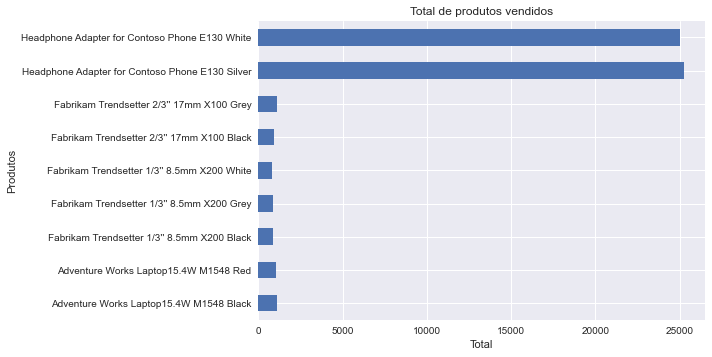

In [23]:
# gráfico com total de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().plot.barh(title='Total de produtos vendidos')
plt.xlabel('Total')
plt.ylabel('Produtos')

### Gráfico com o lucro por ano

Text(0, 0.5, 'Receita')

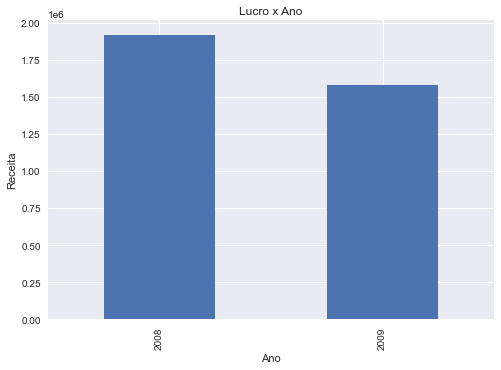

In [24]:
df.groupby(df['Data Venda'].dt.year)['lucro'].sum().plot.bar(title='Lucro x Ano')
plt.xlabel('Ano')
plt.ylabel('Receita')

In [25]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


### Planilha com as vendas de 2009

In [26]:
df_2009 = df[df['Data Venda'].dt.year == 2009].reset_index()
df_2009

,index,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
1,12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
2,13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
3,14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
4,15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,890,2009-12-23,2009-12-30,199,1155,19033,200912234CS949,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","2,755.86",7
431,895,2009-01-11,2009-01-18,307,1155,19113,200901114CS680,324.69,980.00,6,882.00,"4,998.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","3,049.86",7
432,896,2009-03-04,2009-03-15,307,1155,19117,200903044CS706,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","2,755.86",11
433,897,2009-06-12,2009-06-22,307,1226,19126,200906124CS716,330.99,999.00,6,599.40,"5,394.60",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,985.94","3,408.66",10


### Lucro por mês de 2009

Text(0, 0.5, 'lucro')

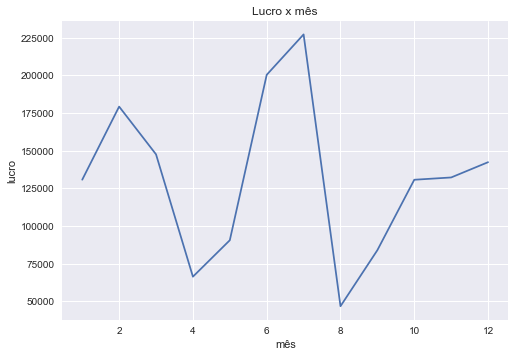

In [27]:
df_2009.groupby([df_2009['Data Venda'].dt.month])['lucro'].sum().plot(title='Lucro x mês')
plt.xlabel('mês')
plt.ylabel('lucro')

### Lucro por marca

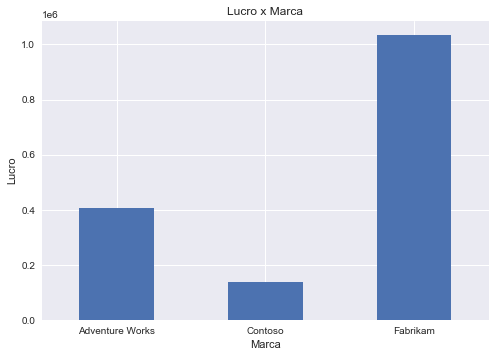

In [28]:
df_2009.groupby(df_2009['Marca'])['lucro'].sum().plot.bar(title='Lucro x Marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');


### Lucro por classe

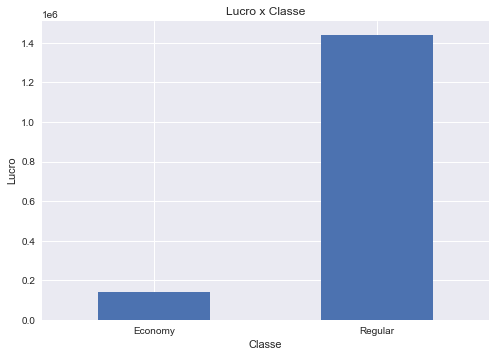

In [29]:
df_2009.groupby('Classe')['lucro'].sum().plot.bar(title='Lucro x Classe')
plt.xlabel('Classe')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

In [30]:
# descrever dados
df['tempo_envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: tempo_envio, dtype: float64

### Gráfico de boxplot

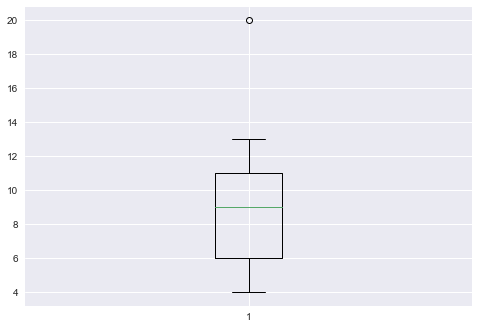

In [31]:
plt.boxplot(df['tempo_envio']);

### Gráfico de histograma

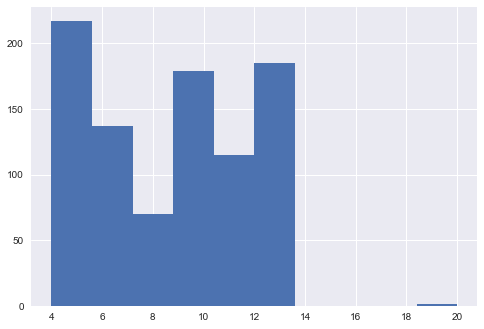

In [32]:
plt.hist(df['tempo_envio']);

In [41]:
# ver qual foi o menor tempo de envio
df['tempo_envio'].min()

4

In [57]:
# ver qual foi o maior tempo de envio
df[df['tempo_envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


### Planilha vendas 2008

In [59]:
df_2008 = df[df['Data Venda'].dt.year == 2008]
df_2008

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,2008-03-22,2008-04-04,306,1226,19049,200803224CS555,330.99,999.00,6,419.58,"5,574.42",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,985.94","3,588.48",13
900,2008-10-04,2008-10-15,306,1155,19057,200810044CS636,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","2,755.86",11
901,2008-12-11,2008-12-15,306,1155,19060,200812114CS676,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","2,755.86",4
902,2008-12-17,2008-12-21,306,1226,19060,200812174CS676,330.99,999.00,6,"1,198.80","4,795.20",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,985.94","2,809.26",4


### Lucro por mês de 2008

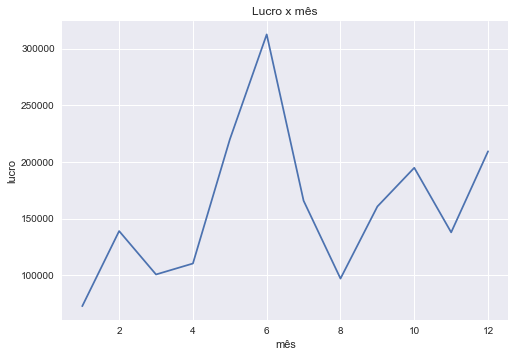

In [72]:
df_2008.groupby(df_2008['Data Venda'].dt.month)['lucro'].sum().plot(title='Lucro x mês')
plt.xlabel('mês')
plt.ylabel('lucro')
plt.xticks(rotation='horizontal');

In [66]:
df_2008.groupby(df_2008['Data Venda'].dt.month)['lucro'].sum().sort_values(ascending=False)

Data Venda
6              312,484.37
5              219,766.94
12             209,317.92
10             194,786.37
7              165,717.63
9              160,624.43
2              138,956.89
11             137,802.75
4              110,316.55
3              100,646.32
8               97,024.11
1               72,633.44
Name: lucro, dtype: float64

### Lucro por marca

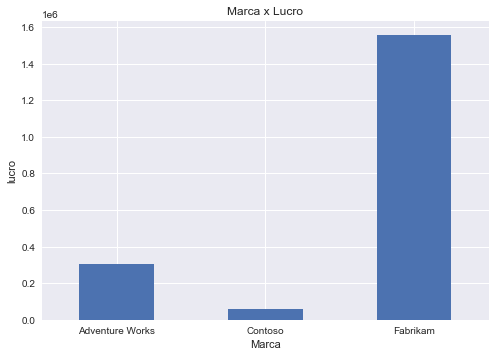

In [74]:
df_2008.groupby('Marca')['lucro'].sum().plot.bar(title='Marca x Lucro')
plt.xlabel('Marca')
plt.ylabel('lucro')
plt.xticks(rotation='horizontal');

### Lucro por classe

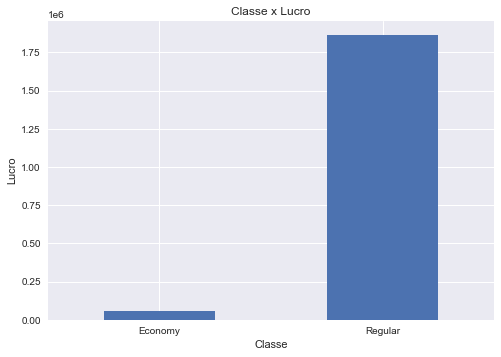

In [78]:
df_2008.groupby('Classe')['lucro'].sum().plot.bar(title='Classe x Lucro')
plt.xlabel('Classe')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

### Maior tempo de envio 2008 e 2009

In [82]:
df_2008['tempo_envio'].max()

20

In [83]:
df_2009['tempo_envio'].max()

13

### Menor tempo de envio 2008 e 2009

In [85]:
df_2008['tempo_envio'].min()

4

In [84]:
df_2009['tempo_envio'].min()

4

### Análise cor mais vendida

In [91]:
df.groupby('Cor')['Quantidade'].sum().sort_values(ascending=False)

Cor
White     25797
Silver    25232
Black      2899
Grey       1932
Red        1047
Name: Quantidade, dtype: int64

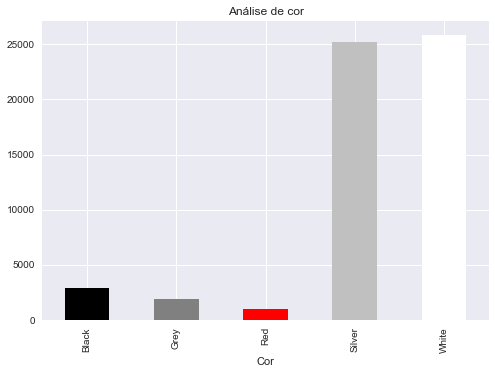

In [101]:
df.groupby('Cor')['Quantidade'].sum().plot.bar(title='Análise de cor', color=['Black', 'Grey', 'Red', 'Silver','White']);